In [9]:
import datetime

import IPython.display
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sklearn
import sklearn.linear_model
import sklearn.model_selection
import pandas_datareader.data as web

In [13]:
df_apple = web.DataReader('AAPL','yahoo','2014-11-01')
df_fb = web.DataReader('FB','yahoo','2014-11-01')
df_gold = web.DataReader('GLD','yahoo','2014-11-01')

In [14]:
df_apple.tail(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-18,281.899994,279.119995,279.799988,279.739990,29007100.0,279.739990
2019-12-19,281.179993,278.950012,279.500000,280.019989,24592300.0,280.019989


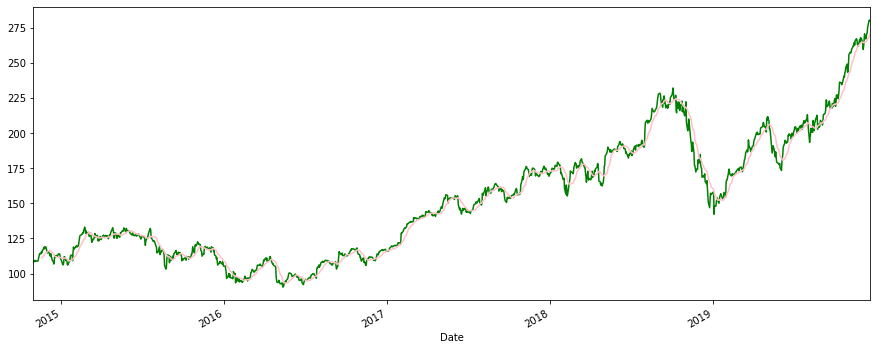

In [15]:
df_apple['SMA'] = df_apple['Close'].rolling(window=14).mean()
df_apple['Close'].plot(figsize=(15,6),color="green")
df_apple['SMA'].plot(figsize=(15,6),color="pink")
plt.show()

In [16]:
df_apple['change'] = (((df_apple['Close'] - df_apple['Open'])) / (df_apple['Open']) * 100)
df_fb['change'] = (((df_fb['Close'] - df_fb['Open'])) / (df_fb['Open']) * 100)
df_gold['change'] = (((df_gold['Close'] - df_gold['Open'])) / (df_gold['Open']) * 100)
df_apple.tail(2).round(2)

,High,Low,Open,Close,Volume,Adj Close,SMA,change
Date,,,,,,,,
2019-12-18,281.90,279.12,279.8,279.74,29007100.0,279.74,270.12,-0.02
2019-12-19,281.18,278.95,279.5,280.02,24592300.0,280.02,271.03,0.19


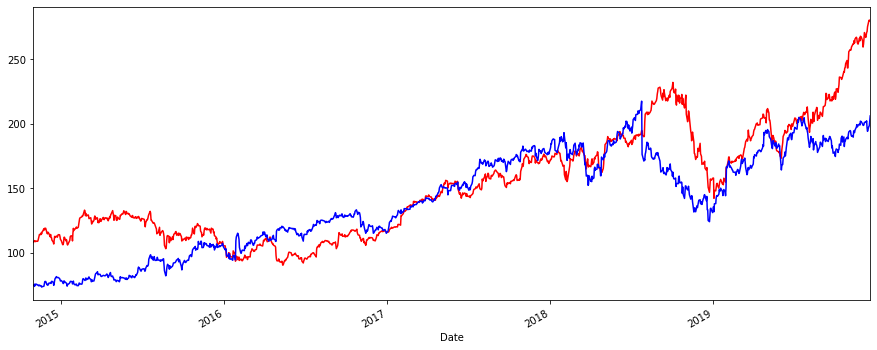

In [20]:
df_apple['Close'].plot(figsize=(15,6),color="red")
df_fb['Close'].plot(figsize=(15,6),color="blue")
plt.show()

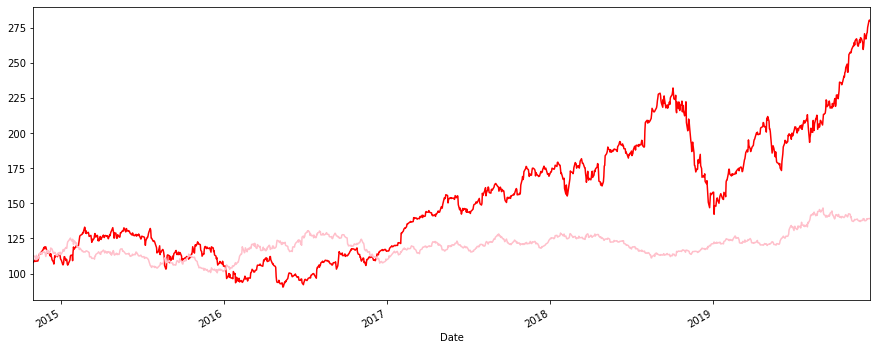

In [22]:
df_apple['Close'].plot(figsize=(15,6),color="red")
df_gold['Close'].plot(figsize=(15,6),color="pink")
plt.show()

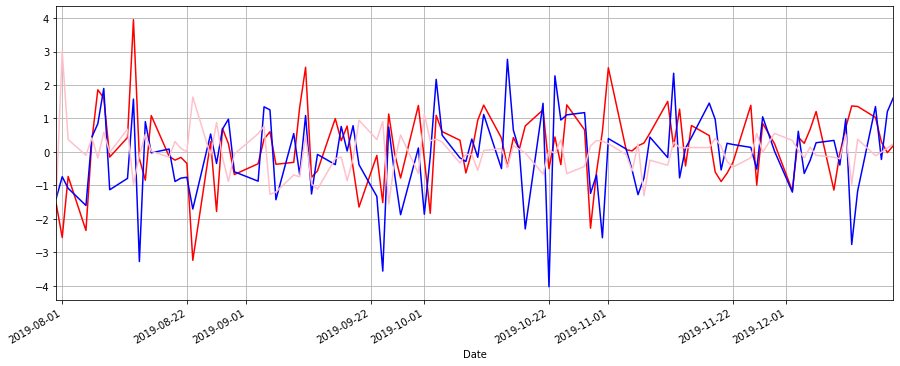

In [23]:
df_apple['change'].tail(100).plot(grid=True,figsize=(15,6),color="red")
df_fb['change'].tail(100).plot(grid=True,figsize=(15,6),color="blue")
df_gold['change'].tail(100).plot(grid=True,figsize=(15,6),color="pink")
plt.show()

In [24]:
df_apple['label'] = df_apple['Close'].shift(-30)
df_apple.tail(40)

,High,Low,Open,Close,Volume,Adj Close,SMA,change,label
Date,,,,,,,,,
2019-10-24,244.800003,241.809998,244.509995,243.580002,17318800.0,242.850891,234.947856,-0.380350,270.709991
2019-10-25,246.729996,242.880005,243.160004,246.580002,18369300.0,245.841919,236.342142,1.406481,266.920013
2019-10-28,249.250000,246.720001,247.419998,249.050003,24143200.0,248.304520,238.102857,0.658801,268.480011
2019-10-29,249.750000,242.570007,248.970001,243.289993,35709900.0,242.561752,239.264285,-2.281403,270.769989
2019-10-30,245.300003,241.210007,244.759995,243.259995,31130500.0,242.531845,240.205000,-0.612845,271.459991
2019-10-31,249.169998,237.259995,247.240005,248.759995,34790500.0,248.015381,241.101427,0.614783,275.149994
2019-11-01,255.929993,249.160004,249.539993,255.820007,37781300.0,255.054260,242.526428,2.516636,279.859985
2019-11-04,257.850006,255.380005,257.329987,257.500000,25818000.0,256.729218,244.110713,0.066068,280.410004
2019-11-05,258.190002,256.320007,257.049988,257.130005,19974400.0,256.360352,245.736428,0.031129,279.739990


In [26]:
X = np.array(df_apple.drop(['label','SMA'],axis=1))
X = sklearn.preprocessing.scale(X)

predict_data = X[-30:]

X = X[:-30]
y = np.array(df_apple['label'])

y = y[:-30]
X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2)

lr = sklearn.linear_model.LinearRegression()
lr.fit(X_train,y_train)

accuracy = lr.score(X_test,y_test)
accuracy

0.9053407603912658

In [27]:
predict_data = lr.predict(predict_data)
predict_data

array([269.92740067, 268.25889176, 269.4013199 , 272.60231336,
       272.467362  , 272.05571367, 274.92120404, 275.34301816,
       275.36930217, 268.85894891, 271.95151493, 271.47928236,
       273.57165846, 271.25245061, 276.36504422, 276.37971932,
       270.80562613, 268.84559935, 271.03255515, 273.81629387,
       278.16053379, 272.31755561, 275.31259177, 279.33236464,
       277.21290692, 281.66276537, 286.632877  , 288.12601732,
       287.85534755, 288.54824868])

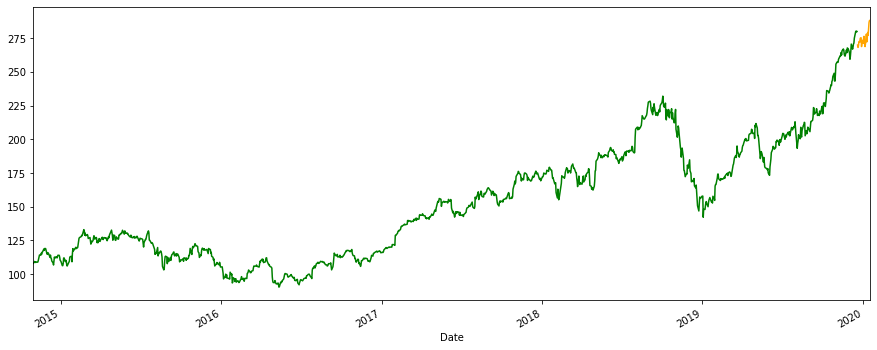

In [28]:
df_apple['Predict'] = np.nan

last_data = df_apple.iloc[-1].name

one_day=86400
next_unix = last_data.timestamp() + one_day

for data in predict_data:
    next_data = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df_apple.loc[next_data] = np.append([np.nan] * (len(df_apple.columns)-1),data)

df_apple['Close'].plot(figsize=(15,6),color="green")
df_apple['Predict'].plot(figsize=(15,6),color="orange")
plt.show()

In [30]:
if df_apple['Predict'][-1] > df_apple['Close'][-31]:
    print("買った方がいいよ")
else:
    print("買わなくて結構")

買った方がいいよ
